In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
! cat 10579552

{"pedometer_mode": "1XX", "app_name": "cc.pacer.androidapp_play", "device_model": "XT1080", "brand": "", "has_step_counter": "1", "app_version_code": 2018052500, "app_version": "p5.5.1"}

# 1. 载入数据

数据形式为每个账号为一个json文件，文件名是用户账号id(account_id)。

测试载入数据:

In [3]:
data = pd.read_json('10579552', typ='series')
data

pedometer_mode                           1XX
app_name            cc.pacer.androidapp_play
device_model                          XT1080
brand                                       
has_step_counter                           1
app_version_code                  2018052500
app_version                           p5.5.1
dtype: object

## 1.1 老用户数据
老用户的environment信息位于10001文件夹内，遍历文件夹，加载全部数据，生成environment_df_old。

In [4]:
environment_file_path_old = "/Users/wangshiyao/Work/retreiveLog/environment_info/10001"
series_list_old = []

for filename in os.listdir(environment_file_path_old):
    filepath = os.path.join(environment_file_path_old, filename)
    ser = pd.read_json(filepath, typ='series')
    ser.name = filename
    series_list_old.append(ser)

In [5]:
environment_df_old = pd.concat(series_list_old, axis=1)
environment_df_old = environment_df_old.T
environment_df_old.index.name='account_id'
environment_df_old.head()

,app_name,app_version,app_version_code,brand,device_model,has_step_counter,pedometer_mode
account_id,,,,,,,
94708582,,p5.5.1,,,SM-A320FL,1,111
165685081,cc.pacer.androidapp_play,p5.5.1,2018052500,,LM-X415K,1,1XX
171675541,,p5.5.1,,,LG-F800L,1,111
154088011,,p5.4.1,,,LG-LS777,1,111
149399431,,p5.4.1,,,SM-G935F,1,111


In [6]:
environment_df_old.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2591 entries, 94708582 to 171080761
Data columns (total 7 columns):
app_name            2519 non-null object
app_version         2577 non-null object
app_version_code    2519 non-null object
brand               2519 non-null object
device_model        2577 non-null object
has_step_counter    2577 non-null object
pedometer_mode      2588 non-null object
dtypes: object(7)
memory usage: 161.9+ KB


## 1.2 新用户数据
新用户的environment信息位于10005文件夹内，遍历文件夹，加载全部数据，生成environment_df_new。

In [7]:
environment_file_path_new = "/Users/wangshiyao/Work/retreiveLog/environment_info/10005"
series_list_new = []

for filename in os.listdir(environment_file_path_new):
    filepath = os.path.join(environment_file_path_new, filename)
    ser = pd.read_json(filepath, typ='series')
    ser.name = filename
    series_list_new.append(ser)

In [8]:
environment_df_new = pd.concat(series_list_new, axis=1, sort=False)
environment_df_new = environment_df_new.T
environment_df_new.index.name='account_id'
environment_df_new.head()

,app_version,app_name,device_model,brand,has_step_counter,app_version_code,pedometer_mode
account_id,,,,,,,
180033841,p5.7.1,cc.pacer.androidapp_play,CPH1723,OPPO,0,2018072000,511
180094366,p5.6.1,cc.pacer.androidapp_play,FEVER,WIKO,0,2018062500,511
180105499,p5.6.1,cc.pacer.androidapp_play,LGL64VL,lge,1,2018062500,111
180079297,p5.6.1,cc.pacer.androidapp_play,Lenovo A536,Lenovo,0,2018062500,511
180176359,p5.7.1,cc.pacer.androidapp_play,SM-G900F,samsung,1,2018072000,111


In [9]:
environment_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4906 entries, 180033841 to 180098386
Data columns (total 7 columns):
app_version         4823 non-null object
app_name            4823 non-null object
device_model        4823 non-null object
brand               4823 non-null object
has_step_counter    4823 non-null object
app_version_code    4823 non-null object
pedometer_mode      4845 non-null object
dtypes: object(7)
memory usage: 306.6+ KB


# 2. 数据清理

## 2.1 清理无用的数据列
### 2.1.1 对于老用户
这次收集的全部是使用硬件计步器进行计步的用户的日志，因此has_step_counter一项没有意义，直接丢弃。

In [10]:
environment_df_old.drop('has_step_counter', axis = 1, inplace=True)
environment_df_old.head()

,app_name,app_version,app_version_code,brand,device_model,pedometer_mode
account_id,,,,,,
94708582,,p5.5.1,,,SM-A320FL,111
165685081,cc.pacer.androidapp_play,p5.5.1,2018052500,,LM-X415K,1XX
171675541,,p5.5.1,,,LG-F800L,111
154088011,,p5.4.1,,,LG-LS777,111
149399431,,p5.4.1,,,SM-G935F,111


### 2.1.2 对于新用户
这次收集的数据使用软件和硬件的都有，因此我们要筛选出使用硬件计步器的用户。

In [11]:
environment_df_new = environment_df_new[environment_df_new.has_step_counter != '0']
environment_df_new.has_step_counter.value_counts()

1    2569
        8
Name: has_step_counter, dtype: int64

In [12]:
environment_df_new.drop('has_step_counter', axis = 1, inplace=True)
environment_df_new.head()

,app_version,app_name,device_model,brand,app_version_code,pedometer_mode
account_id,,,,,,
180105499,p5.6.1,cc.pacer.androidapp_play,LGL64VL,lge,2018062500,111
180176359,p5.7.1,cc.pacer.androidapp_play,SM-G900F,samsung,2018072000,111
180115861,p5.7.1,cc.pacer.androidapp_play,SM-A520F,samsung,2018072000,111
180174856,p5.7.1,cc.pacer.androidapp_play,SM-G930F,samsung,2018072000,111
180050983,p5.6.1,cc.pacer.androidapp_play,SO-03H,docomo,2018062500,111


## 2.2 清理缺失值
### 2.2.1 对于老用户
统计缺失情况

In [13]:
environment_df_old.replace('', np.NaN, inplace=True)
environment_df_old.isna().sum()

app_name            1666
app_version           14
app_version_code    1666
brand               2289
device_model          14
pedometer_mode         7
dtype: int64

重点关注一下device_model（手机型号）字段，因为品牌（brand）和是否有传感器（has_sensor）列的缺失情况可以根据device_model推断而进行填充。查看该字段为na的数据：

In [14]:
environment_df_old[environment_df_old.device_model.isna()]

,app_name,app_version,app_version_code,brand,device_model,pedometer_mode
account_id,,,,,,
146802991,NaN,NaN,NaN,NaN,NaN,1XX
163038190,NaN,NaN,NaN,NaN,NaN,1XX
171524602,NaN,NaN,NaN,NaN,NaN,1XX
170549356,NaN,NaN,NaN,NaN,NaN,1XX
158008711,NaN,NaN,NaN,NaN,NaN,NaN
145063531,NaN,NaN,NaN,NaN,NaN,1XX
165816451,NaN,NaN,NaN,NaN,NaN,1XX
163792051,NaN,NaN,NaN,NaN,NaN,1XX
171883993,NaN,NaN,NaN,NaN,NaN,1XX


通过打印device_model是nan的情况，发现这14条缺失device_model的数据其他column大部分也是nan，无法进行修正填充，可以直接丢弃。

In [15]:
environment_df_old.dropna(subset=[ 'device_model'], inplace=True)
environment_df_old.isna().sum()

app_name            1652
app_version            0
app_version_code    1652
brand               2275
device_model           0
pedometer_mode         4
dtype: int64

### 2.2.2 对于新用户
统计缺失情况

In [16]:
environment_df_new.replace('', np.NaN, inplace=True)
environment_df_new.isna().sum()

app_version         83
app_name            92
device_model        83
brand               99
app_version_code    92
pedometer_mode      62
dtype: int64

打印device_model为空的数据行的情况，发现其他重要数据列也同样为空。

In [17]:
environment_df_new[environment_df_new.device_model.isna()].isna().sum()

app_version         83
app_name            83
device_model        83
brand               83
app_version_code    83
pedometer_mode      61
dtype: int64

清理device_model为空的数据行

In [18]:
environment_df_new.dropna(subset=[ 'device_model'], inplace=True)
environment_df_new.isna().sum()

app_version          0
app_name             9
device_model         0
brand               16
app_version_code     9
pedometer_mode       1
dtype: int64

## 2.3 brand列的补全

有一些数据没有品牌信息（brand），但是可以根据手机型号（device_model）查到品牌信息的，再通过函数定义映射关系，通过fillna写到brand里面。

再看一下数据的NaN分布情况：
对于老用户，有2000+条数据没有brand信息，但是所有的数据都有手机型号信息；新用户又16条没有brand信息，也都有型号信息。

In [19]:
environment_df_old.isna().sum()

app_name            1652
app_version            0
app_version_code    1652
brand               2275
device_model           0
pedometer_mode         4
dtype: int64

In [20]:
environment_df_new.isna().sum()

app_version          0
app_name             9
device_model         0
brand               16
app_version_code     9
pedometer_mode       1
dtype: int64

先看一下老用户没有brand信息的数据的型号情况。

In [21]:
brand_na_df = environment_df_old[environment_df_old['brand'].isna()] #取出所有没有brand信息的数据
model_values = brand_na_df.device_model.value_counts() # 查看他们的型号（device_model）分布情况

In [22]:
pd.options.display.max_rows = 50
model_values[:50]

Redmi Note 4           130
Redmi 4X               105
SM-G950F                81
SM-G935F                61
SM-G930F                60
SM-G955F                43
SM-A520F                42
SM-G955U                42
SM-G950U                36
Moto G (4)              36
Redmi 4A                35
Redmi 4                 35
Redmi 3S                32
Moto G (5) Plus         29
WAS-LX1A                27
SM-G920F                24
PRA-LX1                 24
Redmi Note 3            21
SM-A320FL               20
SM-A510F                20
HUAWEI VNS-L31          19
Moto G (5)              19
MI MAX 2                19
SM-G925F                18
ASUS_Z00AD              18
SM-G900F                16
SM-G930V                14
Moto G (5S) Plus        14
MI 5                    14
Nexus 5                 12
VTR-L09                 11
XT1650                  11
Redmi 5 Plus            11
RNE-L21                 11
LG-D802                 11
E5823                   11
Redmi Note 5A Prime     11
H

看一下新用户的16条无brand的数据的情况。可以看到所有型号基本包括在老用户的数据集内，一个映射函数可以解决。

In [23]:
environment_df_new[environment_df_new.brand.isna()]

,app_version,app_name,device_model,brand,app_version_code,pedometer_mode
account_id,,,,,,
180093982,p5.7.1,cc.pacer.androidapp_play,T06,NaN,2018072000,5XX
180061438,p5.6.1,NaN,CPH1819,NaN,NaN,111
180081088,p5.7.1,cc.pacer.androidapp_play,SM-J210F,NaN,2018072000,5XX
180123841,p5.5.1,NaN,BLN-L21,NaN,NaN,111
180084418,p5.7.1,cc.pacer.androidapp_play,SM-G570F,NaN,2018072000,5XX
180031828,p5.6.1,cc.pacer.androidapp_play,ALE-L21,NaN,2018062500,5XX
180144502,p5.6.1,NaN,PLK-L01,NaN,NaN,111
180057262,p5.6.1,NaN,SM-G925F,NaN,NaN,5XX
180122239,p5.6.1,NaN,SM-G930F,NaN,NaN,5XX


### 2.3.1 映射函数

In [24]:
# 根据以上手机型号，查到对应的品牌，编写转换函数
def map_model_to_brand(model):
    model = model.lower()
    if model.startswith('sm') or model.startswith('samsung') \
    or model.startswith('SC-'.lower()) \
    or model.startswith('SCV'.lower()) \
    or model.startswith('GT-I'.lower()):
        return 'samsung'
    elif model.startswith('redmi') or model.startswith('mi'):
        return 'xiaomi'
    elif model.startswith('moto') \
    or model.startswith('XT10'.lower()) \
    or model.startswith('XT16'.lower()) \
    or model.startswith('XT17'.lower()):
        return 'motorola'
    elif model.startswith('vivo') \
    or model.startswith('Z1'.lower()):
        return 'vivo'
    elif model.startswith('Meizu'.lower()) \
    or model.startswith('MX'.lower()) \
    or model.startswith('M5 Note'.lower()) \
    or model.startswith('m3 note') \
    or model.startswith('pro '):
        return 'Meizu'
    elif model.startswith('Lenovo'.lower()):
        return 'Lenovo'
    elif model.startswith('Asus'.lower()) \
    or model.startswith('ZC520KL'.lower()):
        return 'asus'
    elif model.startswith('SO'.lower()) \
    or model.startswith('Xperia'.lower()) \
    or model.startswith('C6903'.lower()) \
    or model.startswith('D5803'.lower()) \
    or model.startswith('D5503'.lower()) \
    or model.startswith('D65'.lower()) \
    or model.startswith('D66'.lower()) \
    or model.startswith('E66'.lower()) \
    or model.startswith('E58'.lower()) \
    or model.startswith('E68'.lower()) \
    or model.startswith('F51'.lower()) \
    or model.startswith('G81'.lower()) \
    or model.startswith('601SO'.lower()) \
    or model.startswith('602SO'.lower()) \
    or model.startswith('501SO'.lower()):
        return 'sony'
    elif model.startswith('huawei') \
    or model.startswith('T-1000'.lower()) \
    or model.startswith('ANE-'.lower()) \
    or model.startswith('ALE-L'.lower()) \
    or model.startswith('ALP-'.lower()) \
    or model.startswith('BLN-'.lower()) \
    or model.startswith('BND-'.lower()) \
    or model.startswith('CLT-'.lower()) \
    or model.startswith('DIG-'.lower()) \
    or model.startswith('DUK-'.lower()) \
    or model.startswith('DLI-'.lower()) \
    or model.startswith('DLI-'.lower()) \
    or model.startswith('EVA-'.lower()) \
    or model.startswith('EML-'.lower()) \
    or model.startswith('FIG-'.lower()) \
    or model.startswith('FRD-'.lower()) \
    or model.startswith('H60-'.lower()) \
    or model.startswith('JMM-'.lower()) \
    or model.startswith('MHA-'.lower()) \
    or model.startswith('NEM-'.lower()) \
    or model.startswith('PRA-'.lower()) \
    or model.startswith('PLK-'.lower()) \
    or model.startswith('RNE-'.lower()) \
    or model.startswith('STF-'.lower()) \
    or model.startswith('SLA-'.lower()) \
    or model.startswith('TRT-'.lower()) \
    or model.startswith('VTR-'.lower()) \
    or model.startswith('VKY-'.lower()) \
    or model.startswith('WAS-'.lower()) :
        return 'huawei'
    elif model.startswith('nexus') \
    or model.startswith('Pixel'.lower()):
        return 'google'
    elif model.startswith('lg') \
    or model.startswith('VS'.lower()):
        return 'lg'
    elif model.startswith('oneplus') \
    or model.startswith('ONE '.lower()) \
    or model.startswith('A0001'.lower()):
        return 'ONEPLUS'
    elif model.startswith('oppo') \
    or model.startswith('X9009'.lower()) \
    or model.startswith('CPH1'.lower()):
        return 'oppo'
    elif model.startswith('STV100'.lower()) \
    or model.startswith('BBB100-'.lower()):
        return 'blackberry'
    elif model.startswith('Aquaris'.lower()):
        return 'bq'
    elif model.startswith('htc'):
        return 'HTC'
    elif model.startswith('zte') \
    or model.startswith('Z982'.lower()) \
    or model.startswith('N9560'.lower()):
        return 'ZTE'
    elif model.startswith('SH-'.lower()) \
    or model.startswith('605SH'.lower()) \
    or model.startswith('SHV39'.lower()):
        return 'Sharp'
    elif model.startswith('nokia') \
    or model.startswith('TA-10'.lower()):
        return 'Nokia'
    elif model.startswith('le'):
        return 'LeEco'
    elif model.startswith('coolpad'):
        return 'Coolpad'
    elif model.startswith('IM-A910S'.lower()):
        return 'PANTECH'
    elif model.startswith('F-01J'.lower()):
        return 'Fujitsu'
    else:
        return np.nan      
    
map_model_to_brand('CPH1701')

'oppo'

### 2.3.2 对老用户进行转换

In [25]:
environment_df_old['brand'].fillna(environment_df_old['device_model'].map(map_model_to_brand), inplace=True)

In [26]:
# 经过映射替换之后，再查看没有brand的数据情况
brand_na_df = environment_df_old[environment_df_old['brand'].isna()] 
model_values = brand_na_df.device_model.value_counts() 
model_values

Alcatel_6060C    2
D                1
TG-L900S         1
Swift 2          1
Z983             1
                ..
View XL          1
SUGAR C11s       1
VFD 900          1
BLL-L22          1
vernee_M5        1
Name: device_model, Length: 70, dtype: int64

In [27]:
# 剩下的手机brand标记为other
environment_df_old['brand'].fillna('other', inplace=True)

In [28]:
environment_df_old.isna().sum()

app_name            1652
app_version            0
app_version_code    1652
brand                  0
device_model           0
pedometer_mode         4
dtype: int64

In [29]:
environment_df_old.brand = environment_df_old.brand.map(str.lower)
environment_df_old.brand.value_counts()

samsung       936
xiaomi        516
huawei        263
motorola      161
sony          123
lg            123
other          71
asus           56
oneplus        43
google         34
oppo           27
meizu          23
lenovo         21
vivo           18
htc            18
bq             18
lge            17
sharp          15
blackberry     15
nokia          12
zte            12
honor          11
leeco          10
verizon         8
docomo          7
metropcs        4
sg              3
pantech         2
coolpad         2
fujitsu         2
kddi            1
smartisan       1
infinix         1
doogee          1
crosscall       1
wiko            1
Name: brand, dtype: int64

In [30]:
environment_df_old.loc[environment_df_old.brand == 'honor','brand']='huawei'

### 2.3.3 对新用户进行转换

In [31]:
environment_df_new['brand'].fillna(environment_df_new['device_model'].map(map_model_to_brand), inplace=True)
environment_df_new[environment_df_new.brand.isna()]

,app_version,app_name,device_model,brand,app_version_code,pedometer_mode
account_id,,,,,,
180093982,p5.7.1,cc.pacer.androidapp_play,T06,NaN,2018072000,5XX


In [32]:
# 剩下的手机brand标记为other
environment_df_new['brand'].fillna('other', inplace=True)
environment_df_new.brand = environment_df_new.brand.map(str.lower)
environment_df_new.brand.value_counts()

samsung      803
xiaomi       518
huawei       313
motorola     161
lge          145
            ... 
crosscall      1
micromax       1
aermoo         1
blu            1
other          1
Name: brand, Length: 53, dtype: int64

In [33]:
pd.options.display.max_rows = 50
environment_df_new.brand.value_counts()[:50]

samsung       803
xiaomi        518
huawei        313
motorola      161
lge           145
honor          59
sony           54
oneplus        51
asus           46
zte            46
lenovo         41
oppo           37
htc            34
verizon        33
metropcs       30
google         28
meizu          26
vivo           25
docomo         24
nokia          15
bq             14
kddi           11
blackberry     10
letv            6
leeco           5
wiko            4
zuk             4
sharp           2
sg              2
lg              2
essential       2
tcl             2
elephone        2
neffos          2
tgnco           2
kyocera         1
coolpad         1
ulefone         1
vodafone        1
nubia           1
oukitel         1
blackview       1
wileyfox        1
gionee          1
hisense         1
sky             1
casper          1
fujitsu         1
crosscall       1
micromax        1
Name: brand, dtype: int64

In [34]:
environment_df_new.loc[environment_df_new.brand == 'honor','brand'] = 'huawei'

# 3. 探索性分析
## 3.1 品牌的分布情况
计算新老用户的数据总数

In [35]:
environment_df_old.brand.value_counts()

samsung       936
xiaomi        516
huawei        274
motorola      161
sony          123
lg            123
other          71
asus           56
oneplus        43
google         34
oppo           27
meizu          23
lenovo         21
bq             18
vivo           18
htc            18
lge            17
sharp          15
blackberry     15
zte            12
nokia          12
leeco          10
verizon         8
docomo          7
metropcs        4
sg              3
fujitsu         2
pantech         2
coolpad         2
kddi            1
smartisan       1
infinix         1
doogee          1
wiko            1
crosscall       1
Name: brand, dtype: int64

In [36]:
environment_df_new.brand.value_counts()

samsung      803
xiaomi       518
huawei       372
motorola     161
lge          145
            ... 
crosscall      1
micromax       1
aermoo         1
blu            1
other          1
Name: brand, Length: 52, dtype: int64

In [37]:
brand_sum_old = environment_df_old.brand.count()
brand_sum_old

2577

In [38]:
brand_sum_new = environment_df_new.brand.count()
brand_sum_new

2577

计算数量前十的手机占比

In [39]:
brand_value_counts_s_old = environment_df_old[environment_df_old.brand != 'other'].brand.value_counts()
brand_value_counts_s_new = environment_df_new[environment_df_new.brand != 'other'].brand.value_counts()

In [40]:
brand_value_counts_top10_old = brand_value_counts_s_old[:10]
brand_value_counts_top10_old

samsung     936
xiaomi      516
huawei      274
motorola    161
lg          123
sony        123
asus         56
oneplus      43
google       34
oppo         27
Name: brand, dtype: int64

In [41]:
brand_value_counts_top10_new = brand_value_counts_s_new[:10]
brand_value_counts_top10_new

samsung     803
xiaomi      518
huawei      372
motorola    161
lge         145
sony         54
oneplus      51
zte          46
asus         46
lenovo       41
Name: brand, dtype: int64

In [42]:
brand_sum_top_10_old = brand_value_counts_top10_old.sum()
brand_sum_top_10_old

2293

In [43]:
brand_sum_top_10_new = brand_value_counts_top10_new.sum()
brand_sum_top_10_new

2237

In [44]:
# 老用户：品牌数量前十的手机占比
brand_sum_top_10_old/brand_sum_old

0.8897943344974777

In [45]:
# 新用户：品牌数量前十的手机占比
brand_sum_top_10_new/brand_sum_new

0.8680636398913465

In [46]:
brand_value_counts_top10_old['other'] = brand_sum_old - brand_sum_top_10_old
brand_value_counts_top10_old

samsung     936
xiaomi      516
huawei      274
motorola    161
lg          123
sony        123
asus         56
oneplus      43
google       34
oppo         27
other       284
Name: brand, dtype: int64

In [47]:
brand_value_counts_top10_new['other'] = brand_sum_new - brand_sum_top_10_new
brand_value_counts_top10_new

samsung     803
xiaomi      518
huawei      372
motorola    161
lge         145
sony         54
oneplus      51
zte          46
asus         46
lenovo       41
other       340
Name: brand, dtype: int64

In [48]:
%matplotlib notebook

<IPython.core.display.Javascript object>


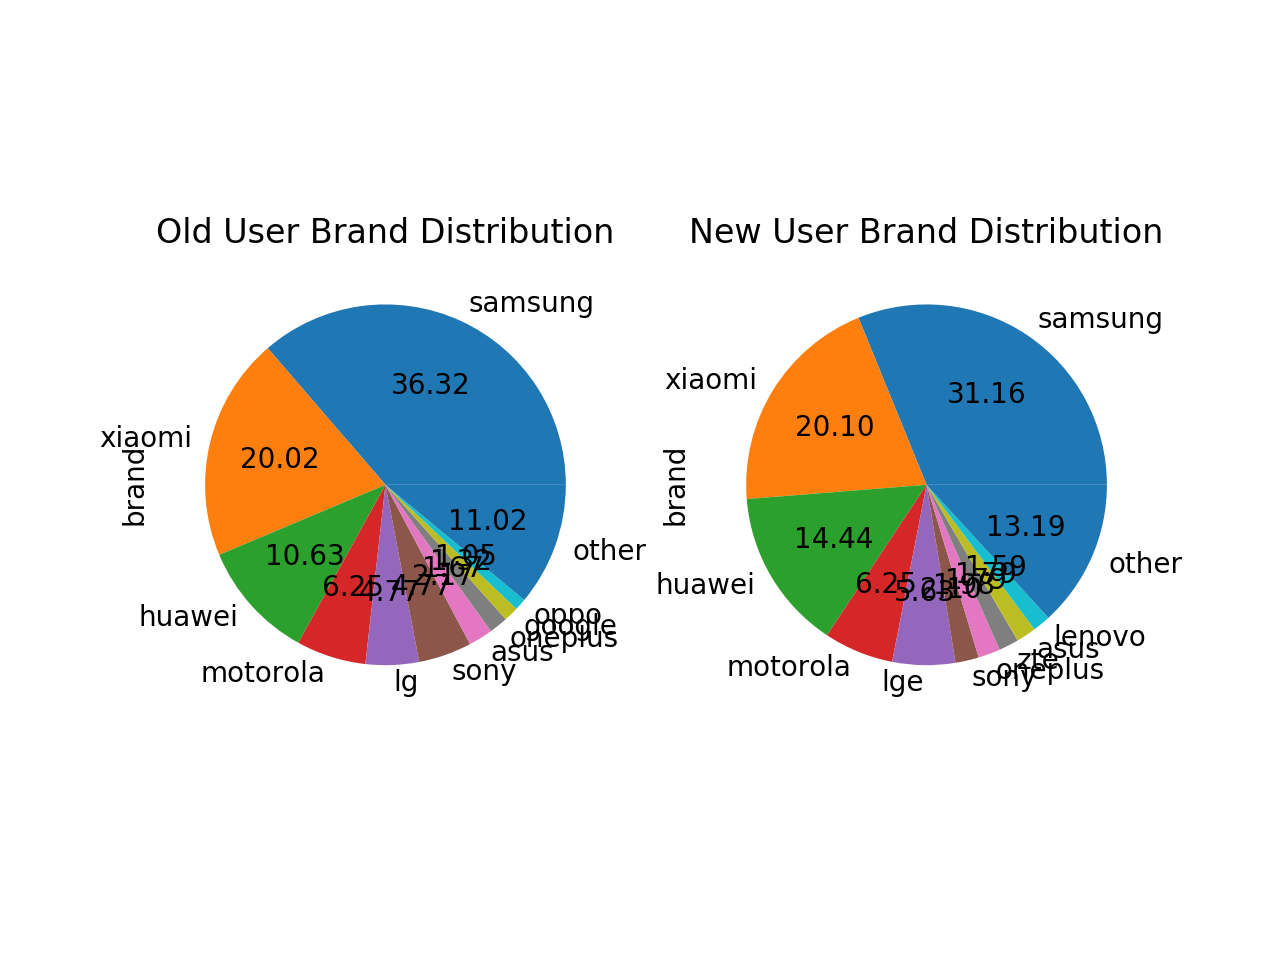

In [49]:
fig, axes = plt.subplots(1, 2)
brand_value_counts_top10_old.plot.pie(autopct='%.2f', ax=axes[0], title='Old User Brand Distribution') 
brand_value_counts_top10_new.plot.pie(autopct='%.2f',  ax=axes[1], title='New User Brand Distribution') 

对比占比前十的手机品牌

In [50]:
brand_value_counts_top10_old.index.to_list()

['samsung',
 'xiaomi',
 'huawei',
 'motorola',
 'lg',
 'sony',
 'asus',
 'oneplus',
 'google',
 'oppo',
 'other']

In [51]:
brand_value_counts_top10_old.index.isin(brand_value_counts_top10_old.index.to_list())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## 3.2 型号分布情况 

In [52]:
total_user_old = environment_df_old.device_model.count()
total_user_new = environment_df_new.device_model.count()
total_user_new

2577

In [53]:
environment_df_old.device_model.value_counts()

Redmi Note 4    134
Redmi 4X        112
SM-G950F        103
SM-G930F         69
SM-G935F         67
               ... 
SLA-L22           1
S60               1
SM-G900K          1
Aquaris M         1
404SH             1
Name: device_model, Length: 579, dtype: int64

In [54]:
environment_df_new.device_model.value_counts()

Redmi 4X        79
Redmi Note 4    71
SM-G930F        52
PRA-LX1         51
SM-A520F        49
                ..
LG-H990          1
SM-G950W         1
LG-D950G         1
SM-G935L         1
LM-X415K         1
Name: device_model, Length: 623, dtype: int64

### 3.2.1 占比前十的型号
分别统计占比前十的型号：

In [55]:
model_value_counts_s_old = environment_df_old.device_model.value_counts()
model_value_counts_s_new = environment_df_new.device_model.value_counts()
model_top10_s_old = model_value_counts_s_old[:10]
model_top10_s_new = model_value_counts_s_new[:10]
model_top10_s_new

Redmi 4X        79
Redmi Note 4    71
SM-G930F        52
PRA-LX1         51
SM-A520F        49
SM-G935F        46
Redmi 5 Plus    46
SM-G920F        45
Redmi 5         42
SM-G950F        42
Name: device_model, dtype: int64

In [56]:
model_top10_s_old

Redmi Note 4    134
Redmi 4X        112
SM-G950F        103
SM-G930F         69
SM-G935F         67
SM-A520F         47
SM-G955F         46
SM-G955U         44
SM-G950U         41
Moto G (4)       39
Name: device_model, dtype: int64

In [57]:
# 老用户：型号数量前十的手机占比
model_top10_s_old.sum()/brand_sum_old

0.2724097788125728

In [58]:
# 新用户：型号数量前十的手机占比
model_top10_s_new.sum()/brand_sum_new

0.20294916569654636

新老用户前十的型号一致的有6个，一致度在60%。

In [59]:
model_top10_s_new.index.to_list()

['Redmi 4X',
 'Redmi Note 4',
 'SM-G930F',
 'PRA-LX1',
 'SM-A520F',
 'SM-G935F',
 'Redmi 5 Plus',
 'SM-G920F',
 'Redmi 5',
 'SM-G950F']

In [60]:
model_top10_s_old.index.isin(model_top10_s_new.index.to_list()).sum()

6

In [61]:
model_top10_s_total = pd.concat([model_top10_s_new.rename('model_new'), model_top10_s_old.rename('model_old')], axis=1, sort=True)
model_top10_s_total.sort_values(by=[ 'model_new'], ascending=False, inplace=True)
model_top10_s_total

,model_new,model_old
Redmi 4X,79.0,112.0
Redmi Note 4,71.0,134.0
SM-G930F,52.0,69.0
PRA-LX1,51.0,NaN
SM-A520F,49.0,47.0
Redmi 5 Plus,46.0,NaN
SM-G935F,46.0,67.0
SM-G920F,45.0,NaN
Redmi 5,42.0,NaN
SM-G950F,42.0,103.0


In [62]:
# 按总人数归一化（此处刚好两组人数相等）
model_top10_s_total = model_top10_s_total/total_user_new
model_top10_s_total

,model_new,model_old
Redmi 4X,0.030656,0.043461
Redmi Note 4,0.027551,0.051998
SM-G930F,0.020179,0.026775
PRA-LX1,0.019790,NaN
SM-A520F,0.019014,0.018238
Redmi 5 Plus,0.017850,NaN
SM-G935F,0.017850,0.025999
SM-G920F,0.017462,NaN
Redmi 5,0.016298,NaN
SM-G950F,0.016298,0.039969


### 3.2.2 占比前20的型号

In [63]:
model_top20_s_old = model_value_counts_s_old[:20]
model_top20_s_new = model_value_counts_s_new[:20]
model_top20_s_new

Redmi 4X           79
Redmi Note 4       71
SM-G930F           52
PRA-LX1            51
SM-A520F           49
SM-G935F           46
Redmi 5 Plus       46
SM-G920F           45
Redmi 5            42
SM-G950F           42
Mi A1              35
Redmi Note 5       35
SM-G925F           32
SM-A510F           32
Moto G (5)         31
Moto G (4)         28
Redmi 4A           28
Moto G (5) Plus    27
SM-G900F           25
SM-A310F           25
Name: device_model, dtype: int64

In [64]:
# 老用户：型号数量前20的手机占比
model_top20_s_old.sum()/total_user_old

0.3853317811408615

In [65]:
# 新用户：型号数量前20的手机占比
model_top20_s_new.sum()/total_user_new

0.3185875048506015

新老用户前20的型号一致的有6个，一致度在60%。

In [66]:
model_top20_s_old.index.isin(model_top20_s_new.index.to_list()).sum()

12

In [67]:
model_top20_s_total = pd.concat([model_top20_s_new.rename('model_new'), model_top20_s_old.rename('model_old')], axis=1, sort=True)
model_top20_s_total.sort_values(by=[ 'model_new'], ascending=False, inplace=True)
# 按总人数归一化（此处刚好两组人数相等）
model_top20_s_total = model_top20_s_total/total_user_new
model_top20_s_total

,model_new,model_old
Redmi 4X,0.030656,0.043461
Redmi Note 4,0.027551,0.051998
SM-G930F,0.020179,0.026775
PRA-LX1,0.019790,0.010477
SM-A520F,0.019014,0.018238
SM-G935F,0.017850,0.025999
Redmi 5 Plus,0.017850,NaN
SM-G920F,0.017462,0.012029
SM-G950F,0.016298,0.039969
Redmi 5,0.016298,NaN


### 3.2.3 柱状图

<IPython.core.display.Javascript object>


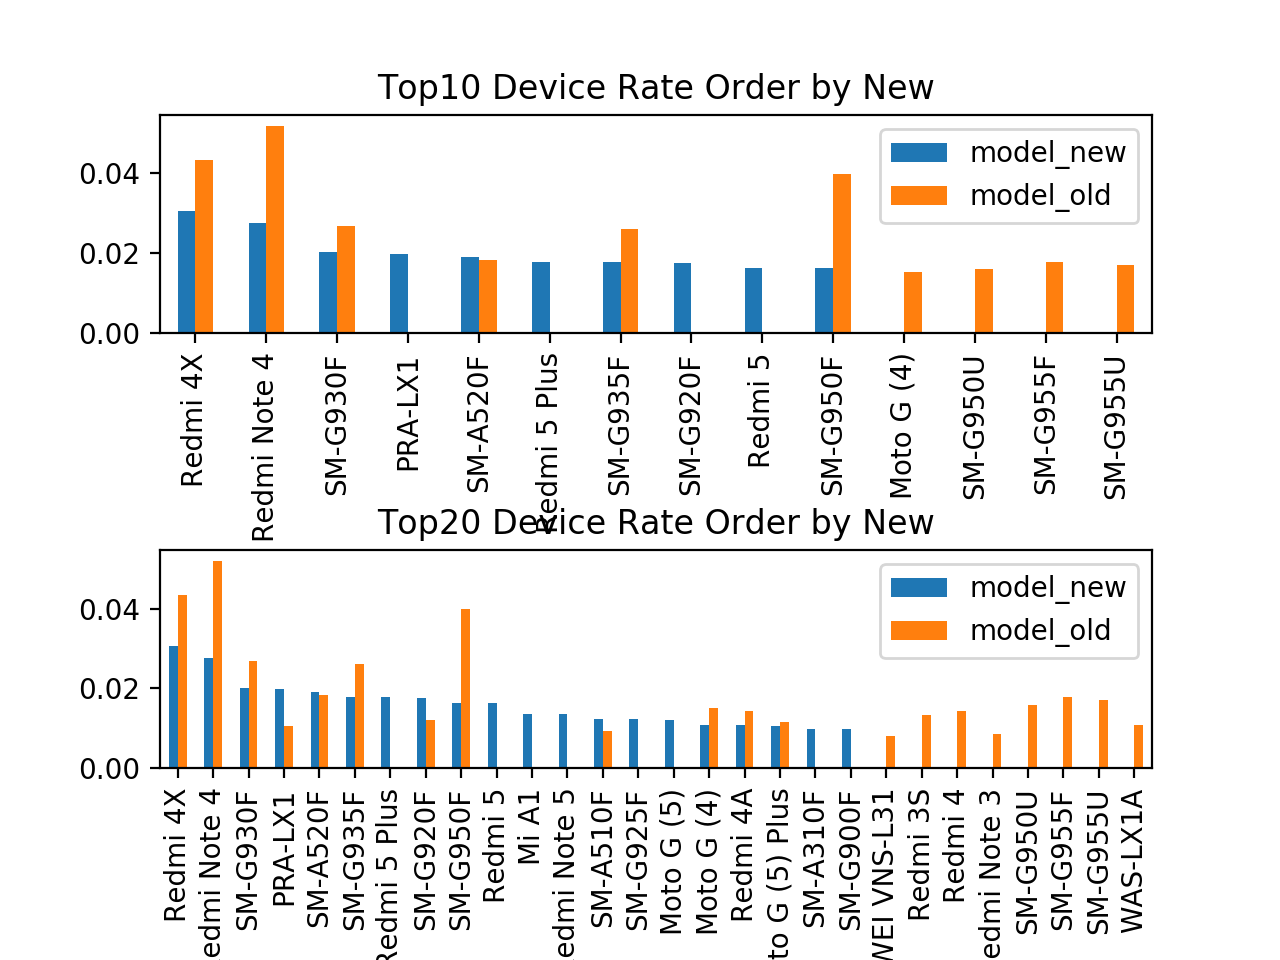

In [68]:
fig, axes = plt.subplots(2, 1)
model_top10_s_total.plot.bar(ax=axes[0], title='Top10 Device Rate Order by New')
model_top20_s_total.plot.bar(ax=axes[1], title='Top20 Device Rate Order by New')
plt.subplots_adjust(hspace = 1.2, bottom=0.2)

## 3.3 版本分布情况

In [69]:
environment_df_old.app_version.value_counts(dropna=False)

p5.5.1    1693
p5.4.1     826
p5.3.1      37
p5.1.2      13
p5.2.3       6
p5.6.1       1
p5.1.1       1
Name: app_version, dtype: int64

In [70]:
environment_df_new.app_version.value_counts(dropna=False)

p5.7.1            1342
p5.6.1            1218
p5.5.1              15
p5.8.1               1
p5.6.1-staging       1
Name: app_version, dtype: int64

In [71]:
plt.subplots_adjust(hspace = 1)

# 4. 结论 
## 4.1 品牌分布情况
通过对比新老用户的品牌分布情况：
1. 占比前十的手机品牌完全一致
2. 占比前十的手机占用户总数：新用户为86.81%， 老用户为88.98%
3. 各品牌内部分布情况也基本无差别

综上，在品牌上没有过多差别，这个划分范围比较大。

## 4.2 型号分布情况
通过对比新老用户的手机型号分布情况可以看出：
1. 占比前十和前二十的型号有60%一致，说明在某些机型可能存在着使用问题，导致用户使用一段时间后放弃使用。
2. 占比前十的手机占用户总数：新用户20.29%，老用户27.24%
    占比前二十的手机占用户总数：新用户31.86%，老用户27.24%
3. 具体变化比较大的机型可以参考柱状图。

综上，机型上可能存在偏差，新用户中比例较高而老用户中比例低的用户可能是问题机型。

## 4.3 版本情况分布
新用户中有4个发型版本，老用户中出现7个，新用户的更新情况好于老用户，符合预期；由于找不到数据收集的日期和当时的发版日期情况，无法对更新状态做更多细致分析。